In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import wandb
import sys
import json
import os
sys.path.insert(1, '..')
from main_code.utils.visualization.tsp_plotter import TSP_plotter
from main_code.utils.wandb.wandb_api import get_table_data_from_url, get_data_for_run
from main_code.utils.data.data_sets import DiskTSPTestSet
from main_code.utils.visualization.plot_functions import *

In [7]:
run_ids = ["1q6fk4ry", "24z6co27"]
run_names = [f"dschaub/rltsp/{run_id}" for run_id in run_ids]

In [25]:
def get_data_for_run_name(run_name):
    # load data from wandb
    api = wandb.Api()
    # https://docs.wandb.ai/ref/python/public-api/run#files
    run = api.run(run_name)
    run_data = get_data_for_run(run)
    return run_data

In [26]:
data_list = []
for run_name in run_names:
    data_list.append(get_data_for_run_name(run_name))

### Training plots

In [32]:
history_df_list = [data["history"] for data in data_list]
# do some processing if necessary
history_df_list[0]

,valid/best_avg_error,_step,train/actor_loss,valid/avg_length,valid/best_avg_length,_runtime,valid/avg_error,train/avg_length,_timestamp
0,0.728458,0,-0.137975,3.860994,3.860994,141,0.728458,3.860109,1646414235
1,0.566758,1,-0.077013,3.854812,3.854812,274,0.566758,3.847998,1646414368
2,0.433122,2,-0.057328,3.849635,3.849635,406,0.433122,3.847848,1646414500
3,0.346387,3,-0.045737,3.846271,3.846271,537,0.346387,3.848374,1646414631
4,0.307254,4,-0.035785,3.844785,3.844785,673,0.307254,3.841936,1646414767
...,...,...,...,...,...,...,...,...,...
1745,0.019840,1745,-0.001026,3.833962,3.833594,275980,0.029408,3.827870,1646690074
1746,0.019840,1746,-0.001011,3.834076,3.833594,276125,0.032367,3.835988,1646690219
1747,0.019840,1747,-0.001445,3.833904,3.833594,276271,0.027773,3.838076,1646690365
1748,0.019840,1748,-0.000592,3.833704,3.833594,276415,0.022695,3.825556,1646690509


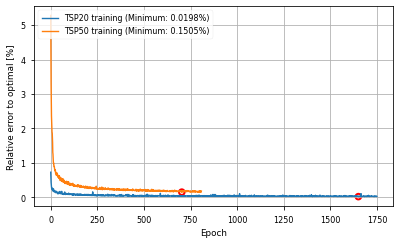

In [38]:
line_plot(
    history_df_list, 
    xvalue='_step', 
    yvalue="valid/avg_error", 
    labels=["TSP20 training", "TSP50 training"], 
    save_path="../results/plots/training_error.png",
    highlight_min=True
)

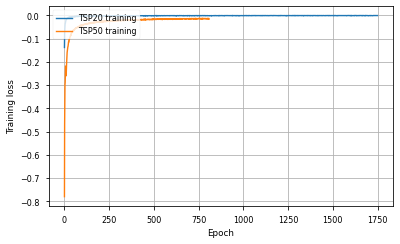

In [35]:
line_plot(
    history_df_list, 
    xvalue='_step', 
    yvalue="train/actor_loss", 
    labels=["TSP20 training", "TSP50 training"], 
    ylabel="Training loss",
    save_path="../results/plots/training_loss.png",
)